# 1. チュートリアル第一部「Data Handling」

## 第一部の目的

- IPythonの使い方について学びます
- 第二部で利用するチュートリアル用のデータについて学びます。
- Pandasを使ったデータの前処理について学びます。
- matploblibを利用したデータの可視化について学びます。

## 使用するパッケージ

- Python 3.4.2
- Pandas 0.15.2
- matplotlib 1.4.3
- IPython[notebook] 3.0.0

## 講師紹介

PyData.Tokyoオーガナイザー 池内 孝啓（@iktakahiro）

株式会社ユーリエ https://eurie.co.jp CEO & Founder

- Twitter: @iktakahiro https://twitter.com/iktakahiro

Python, Go lang, Amazon Web Service

## Agenda

1. データの読み込み
1. 集計・統計解析
1. データの前処理
1. データの可視化

# 1-1. データの読み込み

PandasにはCSVを含め様々なデータを読み込むための関数が既に用意されています。今回利用するデータもCSVですので、下記の一行を実行するとデータフレームに読み込まれます。

## データフレームとは

データベースで言うところのテーブルと同義です。Excelのシートと同じようなものです。関連する数値ベクトルや文字ベクトル、などの異なる型のデータを各行にまとめて格納します。各行・列はラベルを持ち、ラベルによる操作が可能です。Rでも使われていることで知られています。

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.seterr(invalid='ignore') # Workaround

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df[df.Age == 65][["Name", "Age"]]

,Name,Age
54,"Ostby, Mr. Engelhart Cornelius",65.0
280,"Duane, Mr. Frank",65.0
456,"Millet, Mr. Francis Davis",65.0


読み込んだデータを見てみましょう。各カラムにはラベルが付いており、このようなデータが存在します。

- PassengerId: 乗客ID
- Survived: 1 = 生き残り 0 = 死亡
- Pclass: 等級
- Name: 名前
- Sex: 性別
- Age: 年齢
- Parch: 子供の数
- Ticket: チケット番号
- Fare: 運賃
- Cabin: 部屋番号
- Embarked: 乗船地

など

## データを見てみよう

アウトプットの最後に出力されたように、このファイルには891人分(行)の11種類(カラム)のデータが含まれています。

各行に性別、年齢、等級などの値（分析上「素性」と呼ばれる）が入っています。

In [4]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


`head()`関数は引数に指定した行数分、先頭からデータを選択します。

In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


tail()関数は引数に指定した行数分、末尾からデータを選択します。head()関数もtail関数も、行数の指定を省略した場合、5行分のデータを選択します。

特定のカラムのみを指定してデータを抽出できます。

複数カラムの指定もできます。

In [6]:
df[['Name', 'Age', 'Sex']].head(3)

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,female


## 1-2. 集計

describe()関数を利用すると、データフレームの概要を把握することが出来ます。

- count: レコード数です。
- mean: 平均値です。
- std 標準偏差です。
- 最小値です。
- 25%, 50%, 75%: 第1四分位, 中央値、第3四分位です。
- max: 最大値です。


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1つ1つのカラムをもう少し丁寧に見ていきましょう。

In [8]:
max_age = df['Age'].max()
print('年齢の最大値: {0}'.format(max_age))

mean_age = df['Age'].mean()
print('年齢の平均値: {0}'.format(mean_age))

年齢の最大値: 80.0
年齢の平均値: 29.69911764705882


データフレームの特定の列に対して、max()やmean()などの集計実行することが出来ます。

年齢の高い上位10名を確認してみましょう。

上位10名は全員男性のようですね。女性に限定してデータを見てみましょう。

In [9]:
df[df.Sex=='female'][['Name', 'Sex', 'Age']].sort_values(by='Age', ascending=False).head(10)

,Name,Sex,Age
483,"Turkula, Mrs. (Hedwig)",female,63.0
275,"Andrews, Miss. Kornelia Theodosia",female,63.0
829,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0
366,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0
268,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0
195,"Lurette, Miss. Elise",female,58.0
11,"Bonnell, Miss. Elizabeth",female,58.0
772,"Mack, Mrs. (Mary)",female,57.0
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0
15,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0


更に詳しくPandasについて知りたい場合は、Pandasの作者である[Wes Mckinney著 Pythonによるデータ分析入門――NumPy、pandasを使ったデータ処](http://www.oreilly.co.jp/books/9784873116556/)がオススメです。また、オンライン上でも、基本的な情報を網羅した[チュートリアル](https://bitbucket.org/hrojas/learn-pandas)があります。

# 1-3. データの前処理

## 不要カラムの削除

`Cabin`（部屋番号）などの値には多くの欠損データが含まれています。

In [10]:
df['Cabin'].isnull().sum()

687

`Ticket`（チケット番号）は、今回の分析では有用とは考えられません。

In [11]:
df[['Name', 'Ticket']].head()

,Name,Ticket
0,"Braund, Mr. Owen Harris",A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
2,"Heikkinen, Miss. Laina",STON/O2. 3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,"Allen, Mr. William Henry",373450


`Cabin`と`Ticket`のカラムは削除してしまいましょう。

In [12]:
df.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## 欠損値の補間

データフレーム中に、NaN という値があります。これが今回の欠損値です。

In [14]:
df.loc[4:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,S


Pandasには **データの補間** を行うための interpolate()関数が存在します。

In [15]:
df.loc[4:6][['Name', 'Age']].interpolate()

,Name,Age
4,"Allen, Mr. William Henry",35.0
5,"Moran, Mr. James",44.5
6,"McCarthy, Mr. Timothy J",54.0


補間の手法が様々実装されていますが、デフォルトでは線型補間によりデータを補完します。ただし、今回のように並び順に意味のないデータの場合、この方法による補間は有効とは言えません。あくまで関数の紹介目的で解説しました。

次に、年齢の欠損値を、性別毎の年齢の平均値で補間してみます。

In [16]:
female_age_mean = round(df[df.Sex=='female']['Age'].mean())
male_age_mean = round(df[df.Sex=='male']['Age'].mean())

print('女性の平均年齢は{0}歳、男性は{1}歳です。この平均年齢で補間します。'.format(female_age_mean, male_age_mean))

女性の平均年齢は28.0歳、男性は31.0歳です。この平均年齢で補間します。


In [17]:
round(df[df.Sex=='male']['Age'].mean())

31.0

In [18]:
df[df.PassengerId==6][['PassengerId', 'Name', 'Sex', 'Age']]

,PassengerId,Name,Sex,Age
5,6,"Moran, Mr. James",male,NaN


In [19]:
df_female = df[df.Sex=='female'].fillna({'Age': female_age_mean})
df_male = df[df.Sex=='male'].fillna({'Age': male_age_mean})

filled_df = df_female.append(df_male)

In [20]:
filled_df[filled_df.PassengerId==6][['PassengerId', 'Name', 'Sex', 'Age']]

,PassengerId,Name,Sex,Age
5,6,"Moran, Mr. James",male,31.0


## カラムの追加

データフレームにカラムを追加します。

年齢で分類し、数値をふってみましょう。

In [21]:
def classification_age(age):
    if age <= 19:
        return '1'
    elif age <= 34:
        return '2'
    elif age <= 49:
        return '3'
    elif age >= 50:
        return '4'    
    else:
        return '0'
        
filled_df['AgeClass'] = filled_df.Age.map(classification_age)
filled_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeClass
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,1


## 1-4. データの可視化

読み込んだデータをビジュアライズしてどのようなロジックで生存者が見分けられるのか、ざっくり調べてみましょう。可視化にはPandasのプロット関数を使います。ここに紹介した以外にも様々な例があります。

- [Pandas - plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms)

まず、年齢や、性別等によって生存確率がどのように異なるのかを調べるためにデータを可視化してみます。

0 = 死亡, 1 = 生存という２つの軸でテータを見てみます。

Text(0,0.5,'N')

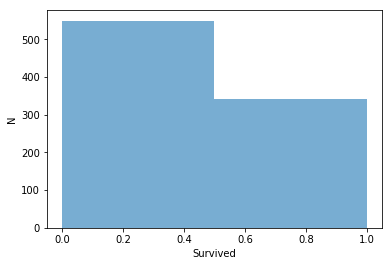

In [22]:
filled_df['Survived'].plot(alpha=0.6, kind='hist', bins=2)
plt.xlabel('Survived')
plt.ylabel('N')

男性 / 女性の軸を加えてデータを見てみましょう。

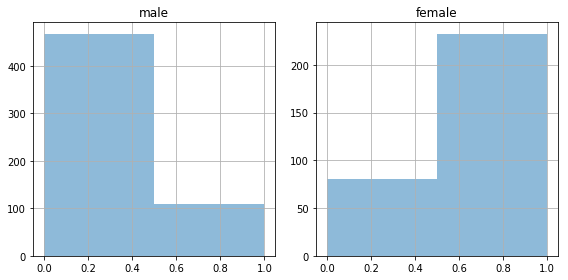

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

for i, sex in enumerate(['male', 'female']):
    filled_df['Survived'][filled_df.Sex==sex].hist(alpha=0.5, bins=2, ax=axes[i])
    axes[i].set_title(sex)

fig.subplots_adjust(hspace=0.3)
fig.tight_layout()

男性よりも、女性のほうが生存率が高いことが分かります。ここに年齢を軸に加えます。

/Users/miyamamoto/.pyenv/versions/miniconda3-4.1.11/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'male')

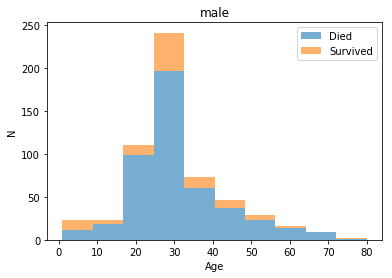

In [24]:
plt.hist([filled_df[(filled_df.Survived==0) & (filled_df.Sex=='male')]['Age'], filled_df[(filled_df.Survived==1) & (filled_df.Sex=='male')]['Age']],
          alpha=0.6, range=(1,80), bins=10, stacked=True,
          label=('Died', 'Survived'))
plt.legend()
plt.xlabel('Age')
plt.ylabel('N')
plt.title('male')

/Users/miyamamoto/.pyenv/versions/miniconda3-4.1.11/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'female')

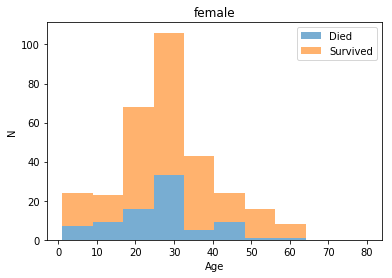

In [25]:
plt.hist([filled_df[(filled_df.Survived==0) & (filled_df.Sex=='female')]['Age'],
          filled_df[(filled_df.Survived==1) & (filled_df.Sex=='female')]['Age']],
          alpha=0.6, range=(1,80), bins=10, stacked=True,
          label=('Died', 'Survived'))
plt.legend()
plt.xlabel('Age')
plt.ylabel('N')
plt.title('female')

/Users/miyamamoto/.pyenv/versions/miniconda3-4.1.11/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


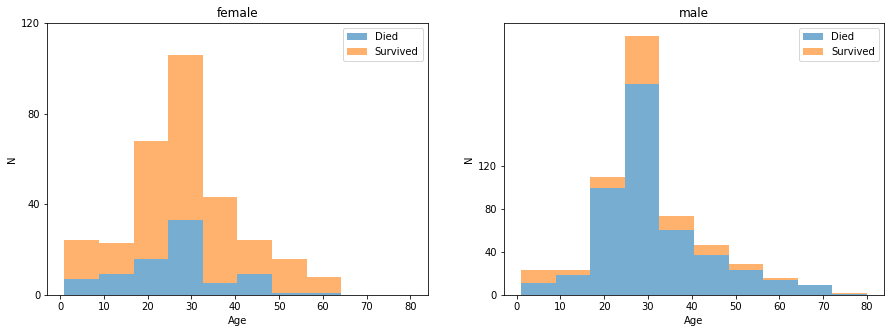

In [26]:
fig = plt.figure(figsize=[15, 5])

ax1 = fig.add_subplot(121)

plt.hist([filled_df[(filled_df.Survived==0) & (filled_df.Sex=='female')]['Age'],
          filled_df[(filled_df.Survived==1) & (filled_df.Sex=='female')]['Age']],
          alpha=0.6, range=(1,80), bins=10, stacked=True,
          label=('Died', 'Survived'))

plt.xlabel('Age')
plt.yticks([0, 40, 80, 120])
plt.ylabel('N')
plt.title('female')
plt.legend()

ax2 = fig.add_subplot(122)

plt.hist([filled_df[(filled_df.Survived==0) & (filled_df.Sex=='male')]['Age'],
          filled_df[(filled_df.Survived==1) & (filled_df.Sex=='male')]['Age']],
          alpha=0.6, range=(1,80), bins=10, stacked=True,
          label=('Died', 'Survived'))

plt.xlabel('Age')
plt.yticks([0, 40, 80, 120])
plt.ylabel('N')
plt.title('male')
plt.legend()

plt.show()

最後に、Pclass（等級）の軸も加えて可視化してみましょう。

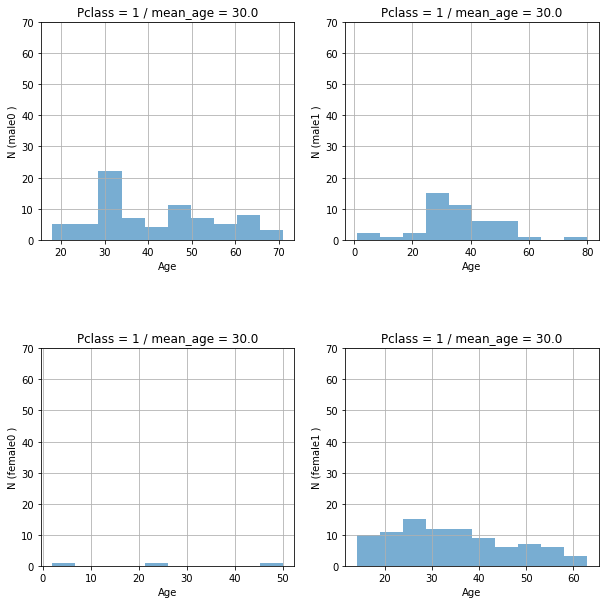

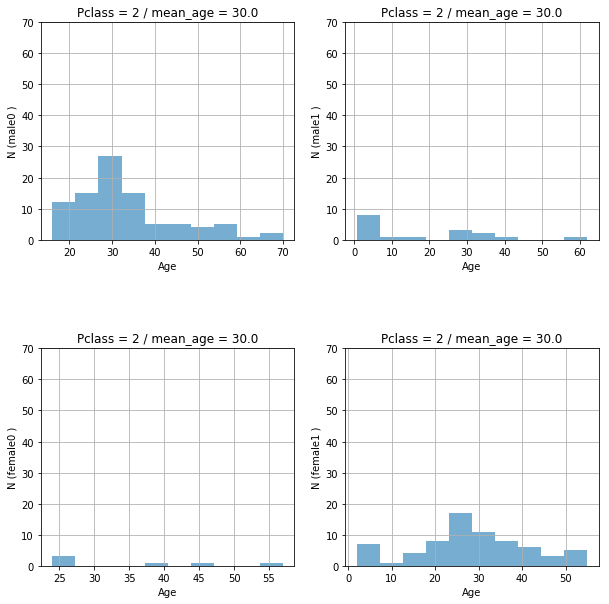

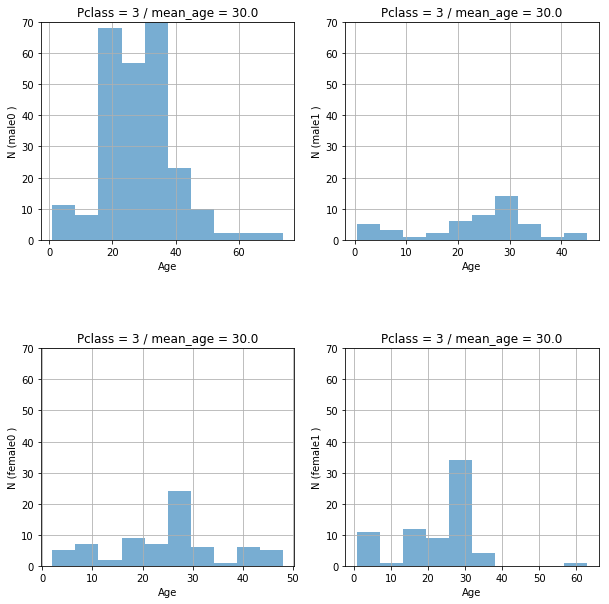

In [27]:
mean_age = df['Age'].mean()

for pclass in [1, 2, 3]:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[10, 10])

    sex_n=0
    for sex in ['male', 'female']:
        for survived in [0, 1]:
                fig = filled_df[((filled_df.Survived==survived) & (filled_df.Sex==sex) & (filled_df.Pclass==pclass) )].Age.hist(alpha=0.6, bins=10, ax=axes[sex_n][survived])
                fig.set_xlabel("Age")    
                fig.set_ylabel('N ('+sex+str(survived)+' )')  
                axes[sex_n][survived].set_ylim(0,70)
                fig.set_title('Pclass = {0} / mean_age = {1}'.format(pclass, round(mean_age)))
                
        sex_n += 1
    plt.subplots_adjust(hspace=0.5)
    plt.show()

# まとめ

- Pandasによるデータの読み込み、前処理、集計の方法を学びました。
- maptloblibによるデータの可視化について学びました。
- Pandasとmatplotlibを利用して、今回利用するデータの性質を確認しました。